# DS4200 Homework 4

Due: Friday Mar 28th @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file included with the coding results and and two `png` files from the part 3 to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted files represent your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the files to gradescope.

### Tips for success
- Start early
- Make use of Piazza
- Make use of Office hour
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

## Part 1: Altair interactive plots

Gapminder is a non-profit organization that promotes global sustainable development and seeks to bridge the gap between misconceptions and data-driven understanding. We are going to explore the a small subset of its data with the information of average income, health score and population for each country in the world. The region information is also provided.

In [ ]:
from google.colab import files
upl = files.upload()

Saving gapminder-health-income.csv to gapminder-health-income.csv


In [ ]:
import altair as alt
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

gapminder = pd.read_csv('gapminder-health-income.csv')
gapminder.head()

country  income  health  population                    region
0  Afghanistan    1925   57.63    32526562                south_asia
1      Albania   10620   76.00     2896679       europe_central_asia
2      Algeria   13434   76.50    39666519  middle_east_north_africa
3      Andorra   46577   84.10       70473       europe_central_asia
4       Angola    7615   61.00    25021974        sub_saharan_africa

### Part 1.1 Add selection (10 points)

Make a scatter plot to show the relationship between average personal income and average health score. Use different colors for different regions. Also add tooltip to it to show the information about the country name and population. In the end, allow the user to select a single country to highlight while all the other become light grey.

In [ ]:
# For highlighting one country upon click
highlight = alt.selection_point(on='click', fields=['country'], empty='all')

# Creates chart where there is more info on country name and population when hovered over and when selected other countries are light grey
chart = alt.Chart(gapminder).mark_circle(size=100).encode(
    x=alt.X('income', title='Average Personal Income'),
    y=alt.Y('health', title='Average Health Score'),
    color=alt.condition(highlight, 'region:N', alt.value('lightgrey')),
    tooltip=['country', 'population']
).add_params(
    highlight
).properties(
    title='Income vs Health Score by Country and Its Region',
    width=600,
    height=400
)

chart

alt.Chart(...)

### Part 1.2 Customize the color (5 points)

Now choose a customized color map for the previous question. Explain how you choose the color map and apply it to the plot. Please do NOT use the pre-defined color palettes in matplotlib, instead, use the websites like Color Brewer or Colorgorical. You can use following line to include your own selected color list (legend_color is your color number list):

    alt.Color('region:N', scale=alt.Scale(range=legend_color))

In [ ]:
# Creates a customized color list
legend_color = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

# Creates the chart with the new custom colors
chart = alt.Chart(gapminder).mark_circle(size=100).encode(
    x=alt.X('income', title='Average Personal Income'),
    y=alt.Y('health', title='Average Health Score'),
    color=alt.condition(
        highlight,
        alt.Color('region:N', scale=alt.Scale(range=legend_color)),
        alt.value('lightgrey')
    ),
    tooltip=['country', 'population']
).add_params(
    highlight
).properties(
    title='Income vs Health Score by Country and Its Region',
    width=600,
    height=400
)

chart

alt.Chart(...)

### Part 1.3 Select across multiple panels (5 points)

Instead of using the point selection, now add an interval selection to the figure in part 1.1, such that the user can select over any income range (only income range), and then generate a second plot on the right to show the relationship between income and population for the given range.

In [ ]:
# Adds interval selection based on income (x)
income_range = alt.selection_interval(encodings=['x'])

# Creates the chart from before with selecting income range as a feature
scatter_health = alt.Chart(gapminder).mark_circle(size=100).encode(
    x=alt.X('income:Q', title='Average Personal Income'),
    y=alt.Y('health:Q', title='Average Health Score'),
    color=alt.Color('region:N'),
    tooltip=['country:N', 'population:Q']
).add_params(
    income_range
).properties(
    width=400,
    height=400,
    title='Income vs Health Score by Country and Its Region'
)

# Creates a chart comparing Income and Population given the selected income range
scatter_population = alt.Chart(gapminder).mark_circle(size=100).encode(
    x=alt.X('income:Q', title='Average Personal Income'),
    y=alt.Y('population:Q', title='Population'),
    color=alt.Color('region:N'),
    tooltip=['country:N', 'population:Q']
).transform_filter(
    income_range
).properties(
    width=400,
    height=400,
    title='Income vs Population Score by Country and Income'
)

# Combines charts
(scatter_health | scatter_population)

alt.HConcatChart(...)

### Part 1.4 Data binding (10 points)

Modified on the part 1.1 figure, instead of the using the legend, now include a radio button on the region such that each selection only highlights one region and make the other points to be grey. Also add the selection to the opacity such that only the selected region has a opacity value 1 while the other are 0.1.

In [ ]:
# Gets sorted unique list of regions
region_options = sorted(gapminder['region'].unique().tolist())

# Creates selection of region with a radio button
region_selection = alt.param(
    name='SelectedRegion',
    bind=alt.binding_radio(
        options=region_options,
        name='Select region: '
    )
)

# Creates the scatter plot with opacity conditions and so that only countries in the selected region are highlighted
chart = alt.Chart(gapminder).mark_circle(size=100).encode(
    x=alt.X('income', title='Average Personal Income'),
    y=alt.Y('health', title='Average Health Score'),
    color=alt.condition(
        'datum.region === SelectedRegion',
        'region:N',
        alt.value('lightgrey')
    ),
    opacity=alt.condition(
        'datum.region === SelectedRegion',
        alt.value(1),
        alt.value(0.1)
    ),
    tooltip=['country', 'population', 'region']
).add_params(
    region_selection
).properties(
    title='Income vs Health Score by Country and Its Region',
    width=600,
    height=400
)

chart

alt.Chart(...)

### Part 1.5 Add filter with bars (10 points)

Modified on the part 1.1 figure, add a slider bar such that for a given value on the bar, we only show the data such that the population of the country is less than the value. You can set the initial cutoff value as 1000000.

In [ ]:
# Adds slider bar for the population with cutoff at 1,000,000
population_slider = alt.param(
    name='PopulationCutoff',
    bind=alt.binding_range(min=0, name='Max population:'),
    value=1000000
)

# Creates the chart from before but now includes the population slider bar
chart = alt.Chart(gapminder).transform_filter(
    'datum.population < PopulationCutoff'
).mark_circle(size=100).encode(
    x=alt.X('income', title='Average Personal Income'),
    y=alt.Y('health', title='Average Health Score'),
    color='region:N',
    opacity=alt.condition(highlight, alt.value(1), alt.value(0.3)),
    tooltip=['country', 'population', 'region']
).add_params(
    population_slider,
    highlight
).properties(
    title='Income vs Health Score by Country and Its Region',
    width=600,
    height=400
)

chart

alt.Chart(...)

### Part 2 Explore the TX population and unemployment rate
#### Part 2.1 Prepare the geospatial data (10 points)

On Canvas, there is a csv file called "unemp.csv", which contains county-level information about unemployment rate and population. Use county level geo-spatial data provided in the lecture to merge two datasets. Then extract the part of data for Texas and make a map for Texas county. Only show the boundary for the counties.

Note: Texas has 254 counties, more than any other U.S. state.

In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
upl = files.upload()

Saving unemp.csv to unemp.csv


In [ ]:
unemp = pd.read_csv("unemp.csv")
unemp.head()

Unnamed: 0  fips    pop  unemp
0           1  1001  23288    9.7
1           2  1003  81706    9.1
2           3  1005   9703   13.4
3           4  1007   8475   12.1
4           5  1009  25306    9.9

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ne_10m_admin_2_counties.dbf to ne_10m_admin_2_counties.dbf
Saving ne_10m_admin_2_counties.prj to ne_10m_admin_2_counties.prj
Saving ne_10m_admin_2_counties.README.html to ne_10m_admin_2_counties.README.html
Saving ne_10m_admin_2_counties.shp to ne_10m_admin_2_counties.shp
Saving ne_10m_admin_2_counties.shx to ne_10m_admin_2_counties.shx
Saving ne_10m_admin_2_counties.VERSION.txt to ne_10m_admin_2_counties.VERSION.txt
Saving ne_10m_admin_2_counties.cpg to ne_10m_admin_2_counties.cpg


In [ ]:
# Loads the county data file from lectures
gdf = geopandas.read_file("ne_10m_admin_2_counties.shp")

# Ensures that the Fips codes are strings with 5 digits
unemp['Fips Code'] = unemp['fips'].astype(str).str.zfill(5)
gdf['Fips Code'] = gdf['FIPS'].str.replace('US', '')

In [ ]:
# To view the data
gdf['Fips Code'].head(10)

0    53073
1    53047
2    53019
3    53065
4    53051
5    16021
6    30053
7    30029
8    30035
9    30101
Name: Fips Code, dtype: object

In [ ]:
# Merges both on the Fips code
merged = gdf.merge(unemp, on='Fips Code')

# Filters for Texas only (code 48)
merged = merged[merged['Fips Code'].str.startswith('48')]

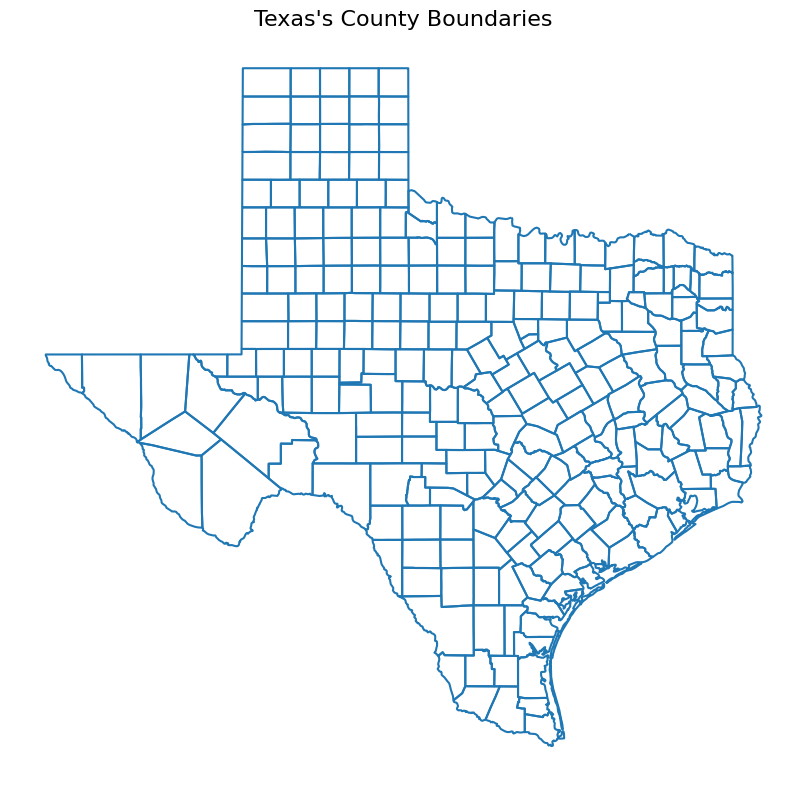

In [ ]:
# Plots Texas's county boundaries
fig, ax = plt.subplots(figsize=(10, 8))
merged.boundary.plot(ax=ax)

# Adds title, removes axes, and shows figure
plt.title("Texas's County Boundaries", fontsize=16)

ax.axis('off')

plt.tight_layout()
plt.show()


#### Part 2.2 creating choropleth maps and customization (5 points)

Make a choropleth maps with unemployment rate. Choose another color map from
https://matplotlib.org/stable/users/explain/colors/colormaps.html. Give a title to the figure (use `plt.title`) as well as a title to the legend.


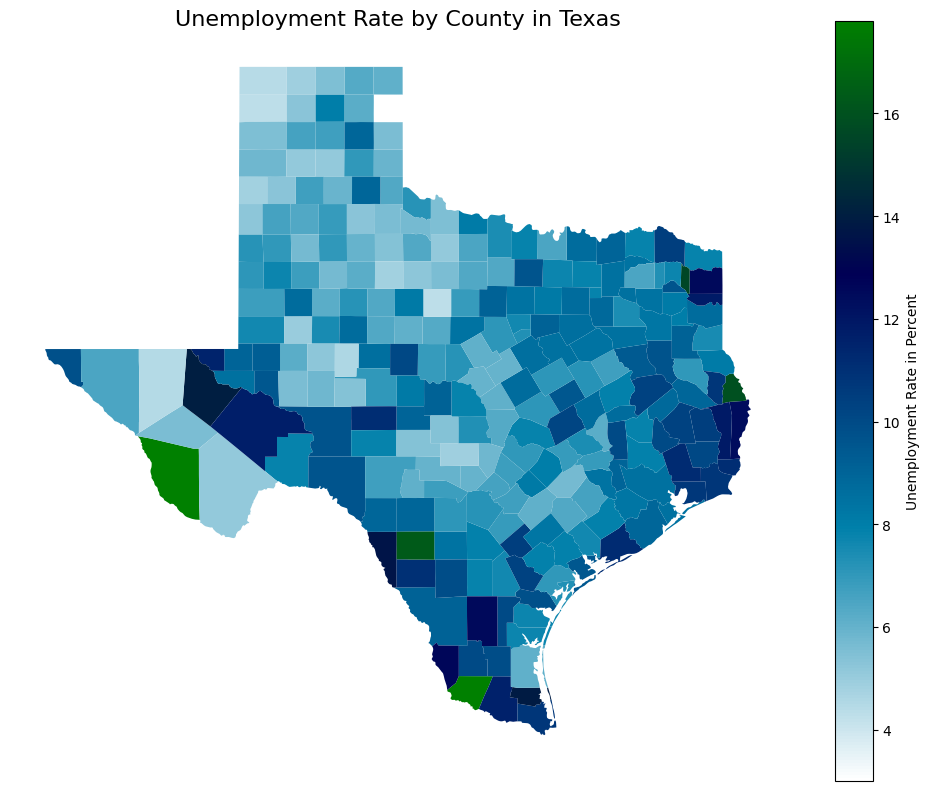

In [ ]:
# Creates choropleth map with unemployment rate (uses ocean_r color map)
fig, ax = plt.subplots(figsize=(10, 8))
merged.plot(
    column='unemp',
    cmap='ocean_r',
    ax=ax,
    legend=True,
    legend_kwds={'label': 'Unemployment Rate in Percent'}
)

# Adds title, turns off axes, and shows
plt.title("Unemployment Rate by County in Texas", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

#### Part 2.3 Handle the missing values (10 points)

Make a copy of your Texas data. Like what we have done in the lecture, randomly select 30 counties and set the unemployment rate as NaN. Plot the choropleth maps for the unemployment rate again. Define the color, boundary, and hatch pattern for the missing value areas. Also include a legend for the missing areas. Chooes a hatch pattern that is different from the lecture note from here: https://matplotlib.org/devdocs/gallery/shapes_and_collections/hatch_style_reference.html

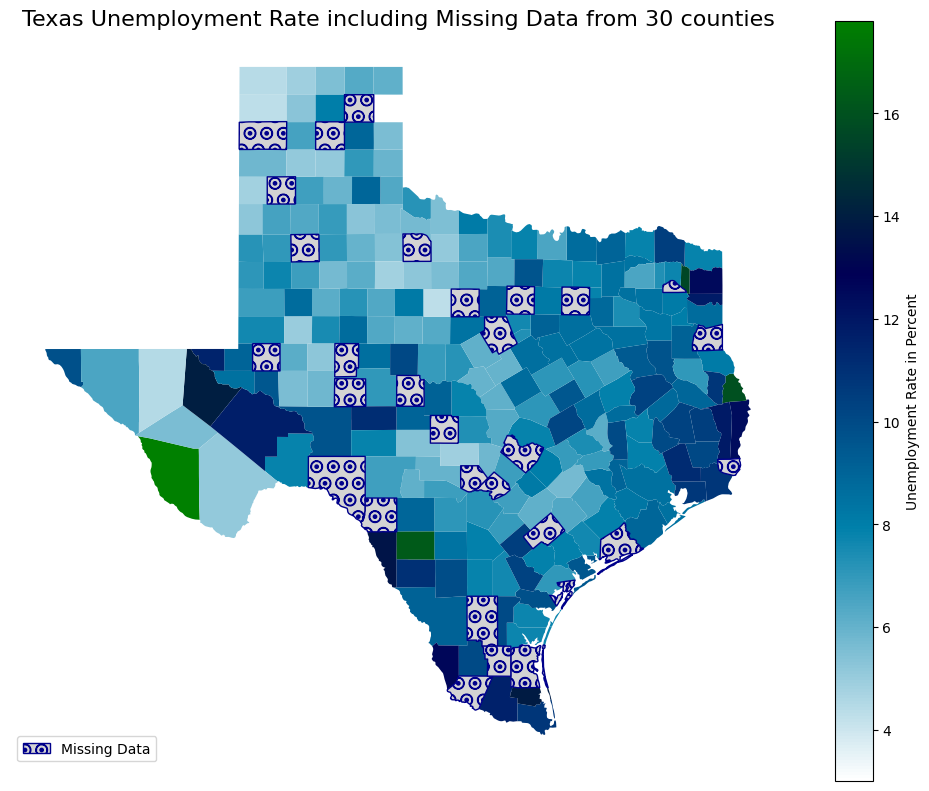

In [ ]:
import numpy as np

# Makes a copy of Texas data
merged_missing = merged.copy()

# Randomly sets unemployment to NaN in 30 counties
np.random.seed(42)
missing_indices = np.random.choice(merged_missing.index, size=30, replace=False)
merged_missing.loc[missing_indices, 'unemp'] = np.nan

# Plots the map with hatching for missing data
fig, ax = plt.subplots(figsize=(10, 8))

# Plots normal data without missing data
merged_missing[merged_missing['unemp'].notnull()].plot(
    column='unemp',
    cmap='ocean_r',
    ax=ax,
    legend=True,
    legend_kwds={'label': 'Unemployment Rate in Percent'}
)

# Plots missing data with the chosen hatch pattern, boundary and fill color
merged_missing[merged_missing['unemp'].isnull()].plot(
    facecolor='lightgray',
    edgecolor='darkblue',
    hatch='O.',
    ax=ax,
    label='Missing Data'
)

# Adds map title
plt.title("Texas Unemployment Rate including Missing Data from 30 counties", fontsize=16)

# Adds a legend for missing areas
import matplotlib.patches as mpatches
missing_patch = mpatches.Patch(
    facecolor='lightgray',
    hatch='O.',
    edgecolor='darkblue',
    label='Missing Data'
)

# Adds to legend manually
plt.legend(handles=[missing_patch], loc='lower left')

# Turns off axes and shows
ax.axis('off')
plt.tight_layout()
plt.show()

#### Part 2.4 Interative Multiple-layer plots (15 points)

There is another attribute in the data which is called `pop`. This attributes represent the population in each county. This is a highly skewed attributed thus we first create a new attribute called `logpop`, which is the log of the population. Then make an interactive map with two layers, one layer is the `logpop` and the second layer is `unemp`. Overlap both layers on the same map. The user should be able to select one or both layer to show and when they click the county, the information of population and unemployment rate are displayed.

Also include another map layer into the figure. Use the code here (m is the name of the map):

    folium.TileLayer("CartoDB positron", show=True).add_to(m)

You can check the page here for other map choices: https://leaflet-extras.github.io/leaflet-providers/preview/

Note: You may need to add some transparency to the top layer so that the bottom layer can be seen when both are selected.

In [ ]:
import folium

# Creates logpop using pop
merged['logpop'] = np.log(merged['pop'])

# Creates map m
m = folium.Map()

# Adds base map
folium.TileLayer("CartoDB positron", show=True).add_to(m)

# Creates a GeoJSON object
geojson_data = merged.to_json()

# Creates the unemployment rate choropleth
folium.Choropleth(
    geo_data=geojson_data,
    name='Unemployment Rate',
    data=merged,
    columns=['Fips Code', 'unemp'],
    key_on='feature.properties.Fips Code',
    fill_opacity=0.6,
    line_opacity=0.4,
    nan_fill_color='gray',
    legend_name='Unemployment Rate in Percent'
).add_to(m)

# Creates the logpop choropleth, making the fill opacity to be slightly transparent
folium.Choropleth(
    geo_data=geojson_data,
    name='Log of Population',
    data=merged,
    columns=['Fips Code', 'logpop'],
    key_on='feature.properties.Fips Code',
    fill_opacity=0.4,
    line_opacity=0.4,
    nan_fill_color='gray',
    legend_name='Log of Population'
).add_to(m)

# Adds selection for county, population, and unemployment rate info
folium.GeoJson(
    geojson_data,
    name="County Info",
    style_function=lambda x: {"fillOpacity": 0},
    tooltip=folium.GeoJsonTooltip(
        fields=["NAME", "pop", "unemp"],
        aliases=["County", "Population", "Unemployment Rate"],
        localize=True
    )
).add_to(m)

# Adds a layer control and displays map
folium.LayerControl(collapsed=False).add_to(m)

m


### Part 3: Tableau with unemployment data

#### Part 3.1 Tableau maps (15 points)

Now let's try to re-create the unemployment map through Tableau. Connect the unemp.csv to the Tableau. Before making any plots, we need to do some data cleaning. Right now, the fips code is considered as integer thus cannot be recognized by the Tableau. Go through each step here and in the end, export a png file and include it with your submission.

+ Connect the unemp.csv to Tableau
+ In the begining, the fips code are considered as integer and some of them are not 5 digit, so we need to create a new column (Create Calculated Field) with the line (to convert 2115, to "02115"):
    Right("00" + Str([Fips]),5)
+ Use the similar way to create another column which only keeps the state level FIPS code. Like "02" for "02115".
+ Choose "county" as the geographical role for the 5-digit FIPS code.
+ On a Worksheet, make a choropleth map for the unemployment rate for Texas counties. You can use the 2-digit state code to filter the data.
+ Edit the figure title, legend title and customize the color choice for the legend.
+ On the top, choose the "map" and "backgroup map", then select "normal". (Feel free to explore how the other options look like)
+ Generate a new dashboard and add the map sheet to it.
+ Set the legend to be floating and put it inside the map.
+ Export the dashboard to a png file and include with the submission.

#### Part 3.1 Tableau bar plot (5 points)

+ Create a new Worksheet
+ Create a bar plot with the 2-digit State code and unployment rate
+ Sort the bar based on the unployment rate
+ Edit the figure title
+ Identify the top 3 and bottom 3 states/regions.
+ Show the caption and edit the caption. In the caption, interpret the figure and include your finding about top 3 and bottom 3.
+ Export the Worksheet to a png file with the caption and include with the submission.